In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import random
from scipy.special import expit
from scipy import optimize


# 1.1 Showing the dataset

In [2]:
data_ex1 = scipy.io.loadmat('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 4/machine-learning-ex3/ex3/ex3data1.mat')
X =  data_ex1['X']
#adding the x0 = 1 at the start of each row in the X.
X = np.insert(X,0,1,axis=1)
y =  data_ex1['y']
#lables of 0 was 10 , so converting back to zero
y [y [:] == 10] = 0


#note:
#X is a 2D array with 5000 pics, each pic rolled into one row (20*20 pixels)    
#y is a 1D array with values from 1 to 10 (0 is labeled as 10)    

print (X.shape)
print('************************************')
print (y.shape)
np.unique(y)

(5000, 401)
************************************
(5000, 1)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
def array_20x20(row_num,X):
    #function to stich the one number into a 20*20 array based on the row number in the X 
    height = 20
    width = 20
    
    return X[row_num,1:].reshape(height,width).T

def stiched_image_mxn (m,n,X):
    #function to stich m*n random images together and display them. returns the rownumber array selected randomly
    #and the y of the seleced images in m*n array.
    #a, b = stiched_image_mxn (5,5,X)
    rows_to_show = np.reshape(random.sample(range(5000),m*n),(m,n))
    
    stiched_image = np.ones((m*20,n*20))
    stiched_y = np.ones((m,n))
    
    for i in range(m):
        for j in range(n):
            row_num = rows_to_show[i][j]
            stiched_image[i*20:((i+1)*20),j*20:((j+1)*20)] = array_20x20(row_num,X)
            stiched_y[i][j] = y[rows_to_show[i][j]][0]
            
    plt.figure(figsize = (10,10))
    plt.imshow(stiched_image)
    
    return rows_to_show, stiched_y

array([[ 4.,  3.],
       [ 5.,  9.]])

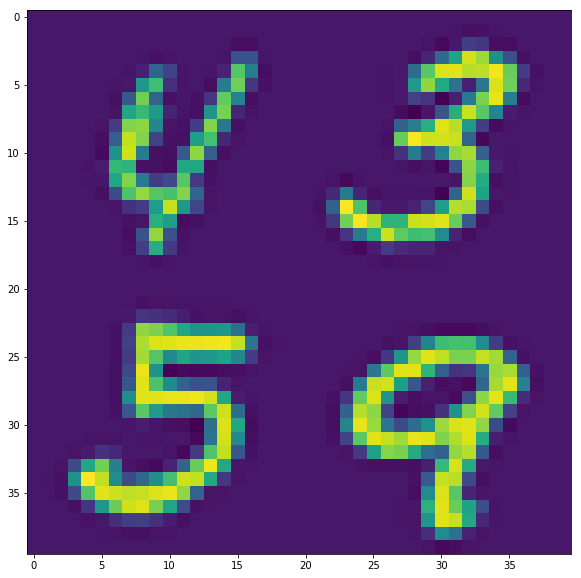

In [4]:
a ,b = stiched_image_mxn (2,2,X)
b

# 1.2 Vectorizing the logistic Regression

In [5]:
#no of test cases.
m = X.shape[0]
#no of variables to be used in the logistic regression
variables = X.shape[1]
#no of nominal outputs
number_of_category = 10
#initializing the input theta (all set to zeroes)
theta = np.zeros((number_of_category,X.shape[1]))
input_lambda = 0

#data frame for storing the output
data = pd.DataFrame({'Output':y.flatten()})

print ('no of test cases    : '+str(m))
print ('theta shape         :'+str(theta.shape))
print ('X shape             :'+str(X.shape))
print ('y shape             :'+str(y.shape))

intermediate_theta = theta[0].reshape(variables,1)
print ('intermediate_theta  :'+str(intermediate_theta.shape))

intermediate_y = np.where(y == 9,1,0)

no of test cases    : 5000
theta shape         :(10, 401)
X shape             :(5000, 401)
y shape             :(5000, 1)
intermediate_theta  :(401, 1)


In [6]:
def hypothesis(X, theta):
    #hypothesis(X, theta)
    return expit(np.dot(X,theta))

def cost_function(theta):
    y = intermediate_y
    #cost_function(intermediate_theta,m,X,intermediate_y,input_lambda = 0.0)
    theta = theta.reshape(X.shape[1],1)
    y = y.reshape(m,1)
    term_1 = np.dot(np.log(hypothesis(X,theta)).T,y)
    term_2 = np.dot(np.log(1-hypothesis(X,theta)).T,(1- y))
    reg    = float(np.dot(theta[1:].T,theta[1:]))*input_lambda/(2*m)
    
    J =  -np.sum(term_1+term_2)/m +reg
    return J

def gradient(theta):
    y = intermediate_y
    #gradient(intermediate_theta,m,X,intermediate_y,input_lambda = 0.0)
    theta = theta.reshape(X.shape[1],1)
    y = y.reshape(m,1)
    return (np.dot(X.T,(hypothesis(X, theta) - y)) +(input_lambda/m)*theta).flatten()

def optimize_theta(theta,m,X,y,input_lambda = 0.0):
    result  = optimize.minimize(cost_function,x0 = theta,jac = gradient ,args=(m,X,y,input_lambda),method='BFGS')
    return result


In [7]:
%%time
for i in range (10):
    intermediate_theta = theta[i].reshape(variables,1)
    intermediate_y = np.where(y == i,1,0)
    result = optimize.minimize(cost_function,x0 = intermediate_theta,jac = gradient)
    theta_intermediate = result['x']
    
    data[i] = (hypothesis(X, theta_intermediate))
    print('Done: ' + str(i))
    

/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Done: 0


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Done: 1


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anacond

Done: 2


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anacond

Done: 3


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Done: 4


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anacond

Done: 5


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anacond

Done: 6


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Done: 7


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Done: 8


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/deepanjal.gupta/anacond

Done: 9
CPU times: user 3min 32s, sys: 3.11 s, total: 3min 36s
Wall time: 1min 53s


/Users/deepanjal.gupta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [8]:
#plt.imshow(array_20x20(1231,X))
data
all_classification = []
for i in range(m):
    all_classification.append(np.argmax(data.loc[i,[0,1,2,3,4,5,6,7,8,9]]))
data['Hypothesis'] = all_classification

In [9]:
#Training accuracy
data[data['Output'] == data['Hypothesis']].shape[0]/data.shape[0]*100

97.6

CPU times: user 64.2 ms, sys: 3.37 ms, total: 67.6 ms
Wall time: 70.5 ms


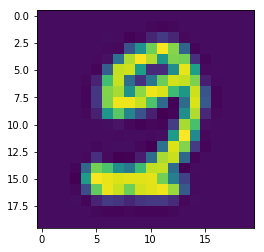

In [10]:
%%time
#data[data['Output'] != data['Hypothesis']]
plt.imshow(array_20x20(1484,X))